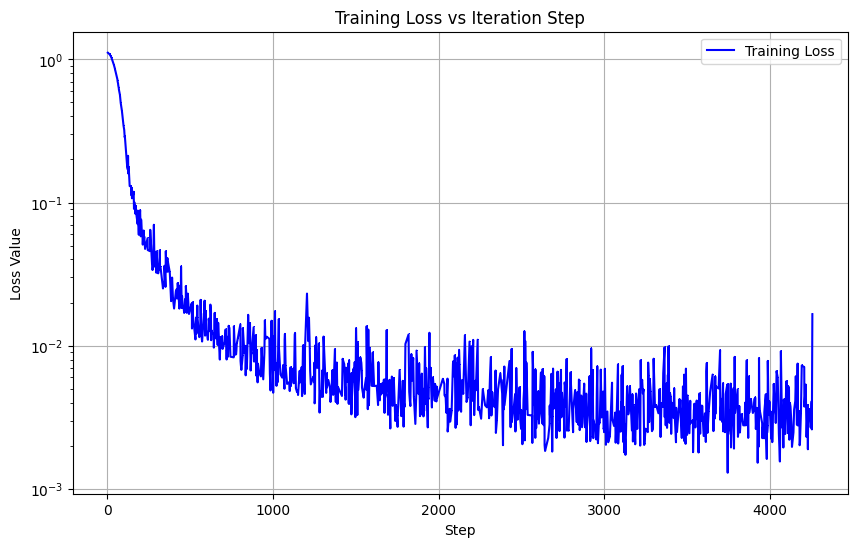

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 读取CSV文件
data = pd.read_csv('DDIM_fine_tune.csv')

# Step 2: 提取步骤（Step）和损失值（Value）
steps = data['Step']
values = data['Value']

# Step 3: 绘制训练损失图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.plot(steps, values, marker=',', linestyle='-', color='b', label='Training Loss')

# 添加标题和标签
plt.title('Training Loss vs Iteration Step')
plt.xlabel('Step')
plt.ylabel('Loss Value')

plt.yscale('log')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


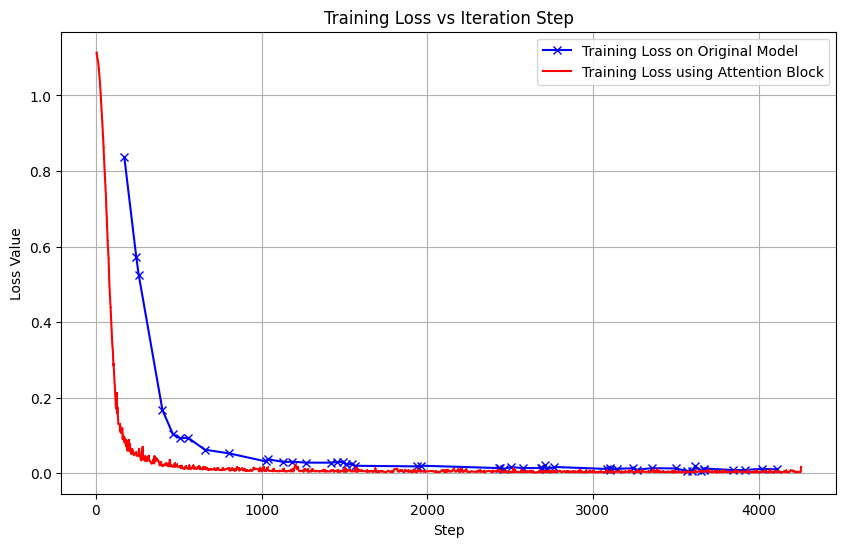

In [25]:
# Step 1: 读取CSV文件
data2 = pd.read_csv('DDPM_origin.csv')

# Step 2: 提取步骤（Step）和损失值（Value）
data2 = data2.head(50)

steps_origin = data2['Step']
values_origin = data2['Value']

# Step 3: 绘制训练损失图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.plot(steps_origin, values_origin, marker='x', linestyle='-', color='b', label='Training Loss on Original Model')

plt.plot(steps, values, marker=',', linestyle='-', color='r', label='Training Loss using Attention Block')

# 添加标题和标签
plt.title('Training Loss vs Iteration Step')
plt.xlabel('Step')
plt.ylabel('Loss Value')

# plt.yscale('log')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.savefig('loss.png')
plt.show()


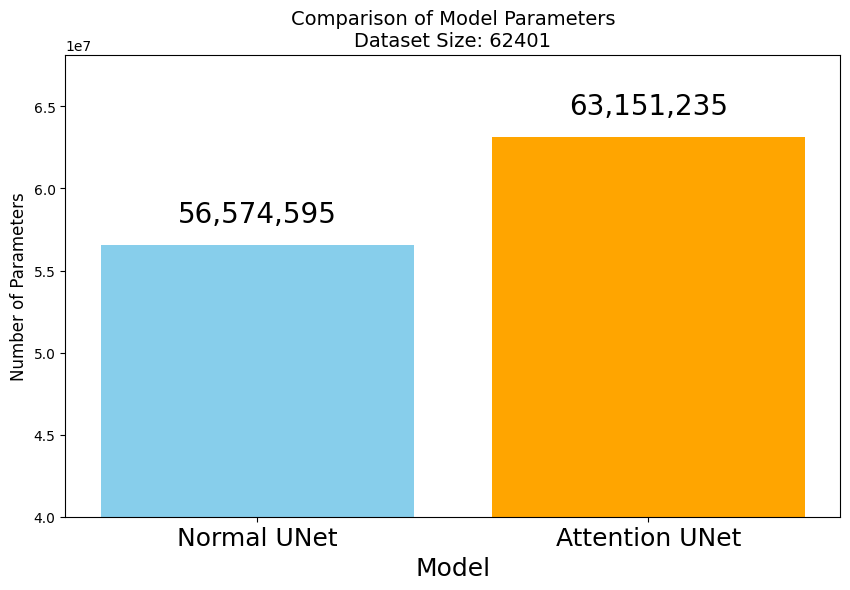

In [26]:
# import matplotlib.pyplot as plt

# 模型参数数量
params_normal_unet = 56574595
params_attention_unet = 63151235

# 数据集数量
dataset_size = 62401

# 模型名称
models = ['Normal UNet', 'Attention UNet']

# 参数数量
params = [params_normal_unet, params_attention_unet]

# 创建柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(models, params, color=['skyblue', 'orange'])

# 设置Y轴的范围，使得最小值从20000000开始
plt.ylim(40000000, max(params) + 5000000)


# 在柱子上方添加参数的数量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000000,  # 在柱子顶部显示文本，稍微向上偏移
             f'{yval:,}',  # 格式化数字以显示千位分隔符
             ha='center', va='bottom', fontsize=20)


# 添加标题和标签
plt.title(f'Comparison of Model Parameters\nDataset Size: {dataset_size}', fontsize=14)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Number of Parameters', fontsize=12)

plt.xticks(fontsize=18)

plt.savefig('params.png')

# 显示柱状图
plt.show()


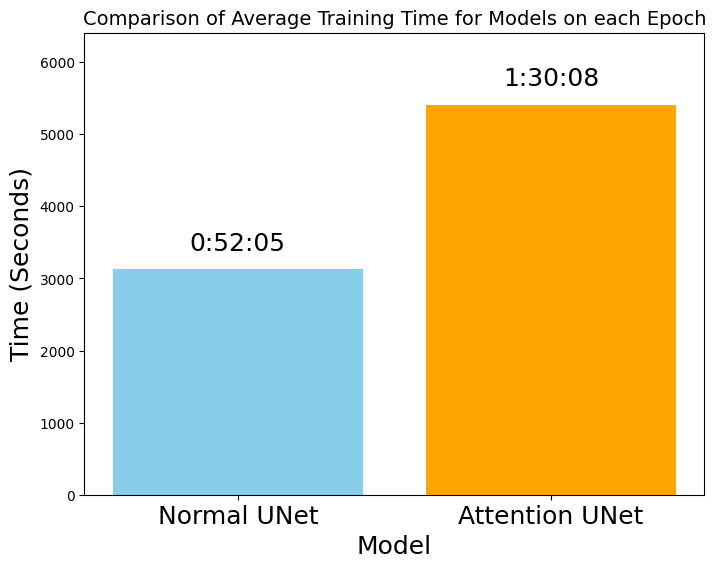

In [27]:
import matplotlib.pyplot as plt
from datetime import datetime

# 时间数据：52:05 和 1:30:08
time_normal_unet = '0:52:05'
time_attention_unet = '1:30:08'

# 将时间字符串转换为秒
def time_to_seconds(time_str):
    t = datetime.strptime(time_str, '%H:%M:%S')
    return t.hour * 3600 + t.minute * 60 + t.second

# 转换为秒
time_normal_unet_seconds = time_to_seconds(time_normal_unet)
time_attention_unet_seconds = time_to_seconds(time_attention_unet)

# 模型名称
models = ['Normal UNet', 'Attention UNet']

# 训练时间（单位：秒）
times = [time_normal_unet_seconds, time_attention_unet_seconds]

# 创建柱状图
plt.figure(figsize=(8, 6))
bars = plt.bar(models, times, color=['skyblue', 'orange'])

# 设置Y轴的范围，使得最小值为0
plt.ylim(0, max(times) + 1000)

# 在柱子上方添加训练时间（以时:分:秒格式显示）
for bar in bars:
    yval = bar.get_height()
    hours = yval // 3600
    minutes = (yval % 3600) // 60
    seconds = yval % 60
    time_str = f'{int(hours)}:{int(minutes):02}:{int(seconds):02}'
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 200, time_str, ha='center', va='bottom', fontsize=18)

# 添加标题和标签，并调整字体大小
plt.title('Comparison of Average Training Time for Models on each Epoch', fontsize=14)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Time (Seconds)', fontsize=18)

# 设置X轴模型名称的字体大小为18
plt.xticks(fontsize=18)

plt.savefig('time.png')

# 显示柱状图
plt.show()
